## Modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

## Config

In [ ]:
result_data = ""

## Statistics

In [3]:
result_df = pd.read_csv(result_data, sep=';')
result_df

,Unnamed: 0,reference,question,correct_answer,answer_w_ref,answer_no_ref,rouge1_fmeasure
0,0,1943 novemberében Hitler Erwin Rommelt nevezte...,Miért Rommelt nevezte ki Hitler a francia védm...,Nincs elegendő adat a kérdés megválaszolásához.,Nincs elegendő adat a kérdés megválaszolásához...,"Nem létezik megbízható forrás, amely megerősít...",0.956522
1,1,A gyermeket hét-nyolc éves korában az 1692–169...,Mikor veszítette el édesanyját Johann Sebastia...,A korabeli feljegyzések szerint a gyermek Bach...,"A fiú korán, mindössze kilencévesen veszítette...","Johann Sebastian Bach édesanyja, Maria Elisabe...",0.575758
2,2,A telepes lakásépítés a századfordulón egyre n...,Hány lakóháazt építettek a Wekerle-telepre?,A kor legismertebb példája a budapesti Wekerle...,A telepes lakásépítés a századfordulón egyre n...,Nincs adat a Wekerle-telep lakóházainak számáról.,0.553191
3,3,a szennyvíz és a szennyezett levegő tisztításá...,Kitől kell függetlennek lennie az OEKO-TEX STe...,Nincs elegendő adat a kérdés megválaszolásához.,"Az üzemet egy arra illetékes, az OEKO-TEX Szer...",Az OEKO-TEX STeP auditot egy olyan személy vég...,0.064516
4,4,1833. október 13-án Ilja Petrovics újból megnő...,Ilja Petrovics Csajkovszkijnak és Alekszandra...,"Házasságukból hét gyermek született, de első l...","Házasságukból hét gyermek született, de első l...",Ilja Petrovics Csajkovszkij és Alekszandra And...,0.967742
...,...,...,...,...,...,...,...
678,678,A Maine-öbölben a szervezett bálnafigyelésekko...,Milyen bálnák láthatók a Maine-öbölben?,Nincs elegendő adat a kérdés megválaszolásához.,A Maine-öbölben a szervezett bálnafigyelésekko...,A Maine-öbölben a következő bálnafajok láthatók:,0.206897
679,679,Az Intelmek Szent István király intelmei Imre ...,Mit jelent az admonitiones szó?,"A király fiához, a trónörökös Imre herceghez i...",Nincs elegendő adat a kérdés megválaszolásához...,Az admonitiones (azaz figyelmeztetések) a kora...,0.228571
680,680,Magyar Királyi Állami Főgimnázium (Tündérpalot...,Melyik útról nyílik a volt Magyar Királyi Álla...,Magyar Királyi Állami Főgimnázium (Tündérpalot...,Magyar Királyi Állami Főgimnázium (Tündérpalot...,Melyik útról nyílik a volt Magyar Királyi Álla...,0.887460
681,681,"1981-ben adódott az első lehetőség arra, hogy ...",Mikor kapta meg Puskás a Kispest díszpolgára c...,1991-ben végleg Magyarországra költözött. Még ...,1991-ben végleg Magyarországra költözött. Még ...,A Kispesti Munkás Testedző Kör (KMTE) 1967. má...,0.977778


In [4]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0
for index, row in result_df.iloc[:].iterrows():
    if not result_df.loc[index, "correct_answer"].startswith("Nincs elegendő adat a kérdés megválaszolásához.") and not result_df.loc[index, "answer_w_ref"].startswith("Nincs elegendő adat a kérdés megválaszolásához."):
        true_positive = true_positive + 1
    elif result_df.loc[index, "correct_answer"].startswith("Nincs elegendő adat a kérdés megválaszolásához.") and not result_df.loc[index, "answer_w_ref"].startswith("Nincs elegendő adat a kérdés megválaszolásához."):
        false_positive = false_positive + 1
    elif result_df.loc[index, "correct_answer"].startswith("Nincs elegendő adat a kérdés megválaszolásához.") and result_df.loc[index, "answer_w_ref"].startswith("Nincs elegendő adat a kérdés megválaszolásához."):
        true_negative = true_negative + 1
    elif not result_df.loc[index, "correct_answer"].startswith("Nincs elegendő adat a kérdés megválaszolásához.") and result_df.loc[index, "answer_w_ref"].startswith("Nincs elegendő adat a kérdés megválaszolásához."):
        false_negative = false_negative + 1


In [5]:
print(f"{true_positive=}")
print(f"{false_positive=}")
print(f"{true_negative=}")
print(f"{false_negative=}")

true_positive=370
false_positive=48
true_negative=161
false_negative=104


In [6]:
precision = true_positive/(true_positive+false_positive)
recall = true_positive/(true_positive+false_negative)
accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)

print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("Accuracy = " + str(accuracy))

Precision = 0.8851674641148325
Recall = 0.7805907172995781
Accuracy = 0.7774524158125915


## Grid-search analysis

In [3]:
input_csv = "/mnt/shared/tibor/llm-hun-performance-benchmarks/adapters/grid-search-3-7b-4bq/grid-search-results-7b-4bitq.csv"

# Convert the CSV data into a DataFrame
df = pd.read_csv(input_csv, sep=';')

# Convert train_time from h:m:s to total seconds for easier plotting
def convert_time_to_seconds(t):
    h, m, s = map(int, t.split(':'))
    return h * 3600 + m * 60 + s

df['train_time_seconds'] = df['train_time'].apply(convert_time_to_seconds)

df.head()


,adapter_name,base_model,q_value,epoch_value,r_value,lora_alpha_value,train_time,vram_usage,f1_score,train_time_seconds
0,Llama-2-7b-chat-hf_4b_q_8_r_16_a,Llama-2-7b-chat-hf,4,3,8,16,1:2:32,18505.0,0.514139,3752
1,Llama-2-7b-chat-hf_4b_q_8_r_16_a,Llama-2-7b-chat-hf,4,6,8,16,2:6:30,18505.0,0.570460,7590
2,Llama-2-7b-chat-hf_4b_q_8_r_16_a,Llama-2-7b-chat-hf,4,12,8,16,4:14:16,18505.0,0.569036,15256
3,Llama-2-7b-chat-hf_4b_q_8_r_32_a,Llama-2-7b-chat-hf,4,3,8,32,1:2:27,18237.0,0.537454,3747
4,Llama-2-7b-chat-hf_4b_q_8_r_32_a,Llama-2-7b-chat-hf,4,6,8,32,2:6:21,18237.0,0.570471,7581


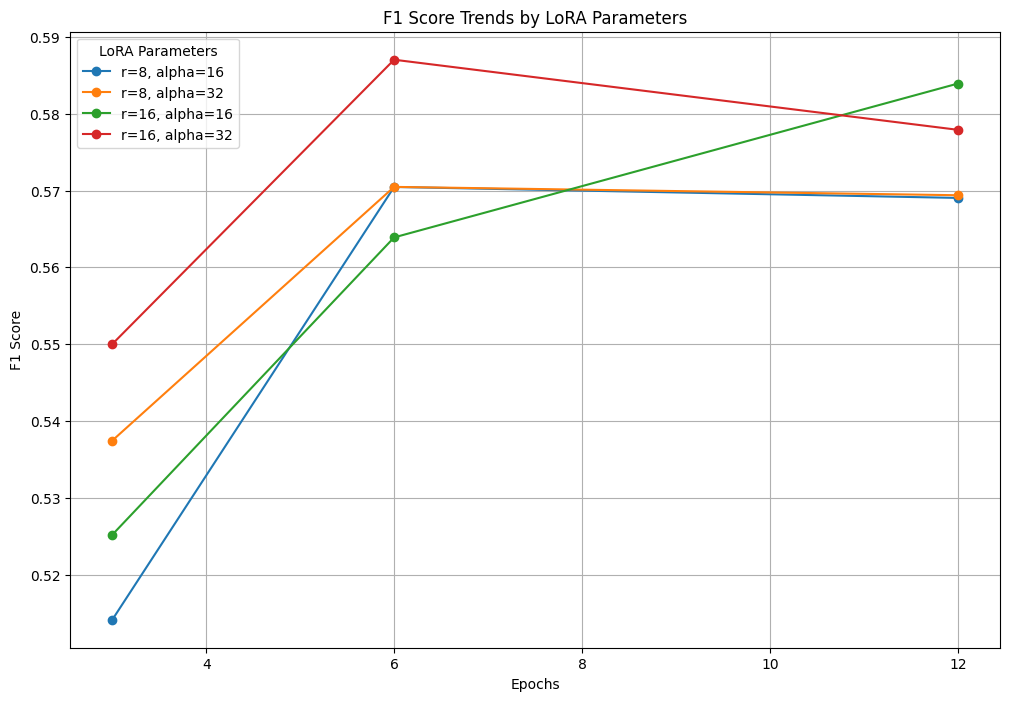

In [5]:
# F1 Score Trends
fig, ax = plt.subplots(figsize=(12, 8))

for (r_value, lora_alpha_value), group in df.groupby(['r_value', 'lora_alpha_value']):
    ax.plot(group['epoch_value'], group['f1_score'], marker='o', linestyle='-', label=f'r={r_value}, alpha={lora_alpha_value}')

ax.set_xlabel('Epochs')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Trends by LoRA Parameters')
ax.legend(title='LoRA Parameters')
plt.grid(True)
plt.show()

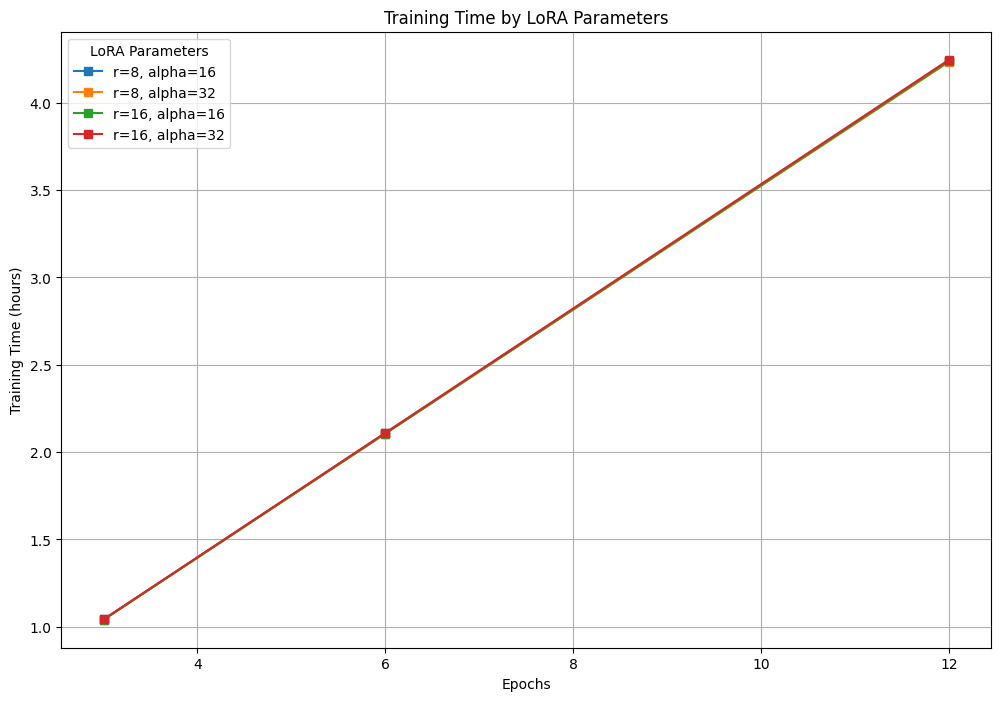

In [6]:
# Training Time Analysis
fig, ax = plt.subplots(figsize=(12, 8))

for (r_value, lora_alpha_value), group in df.groupby(['r_value', 'lora_alpha_value']):
    ax.plot(group['epoch_value'], group['train_time_seconds']/3600, marker='s', linestyle='-', label=f'r={r_value}, alpha={lora_alpha_value}')

ax.set_xlabel('Epochs')
ax.set_ylabel('Training Time (hours)')
ax.set_title('Training Time by LoRA Parameters')
ax.legend(title='LoRA Parameters')
plt.grid(True)
plt.show()

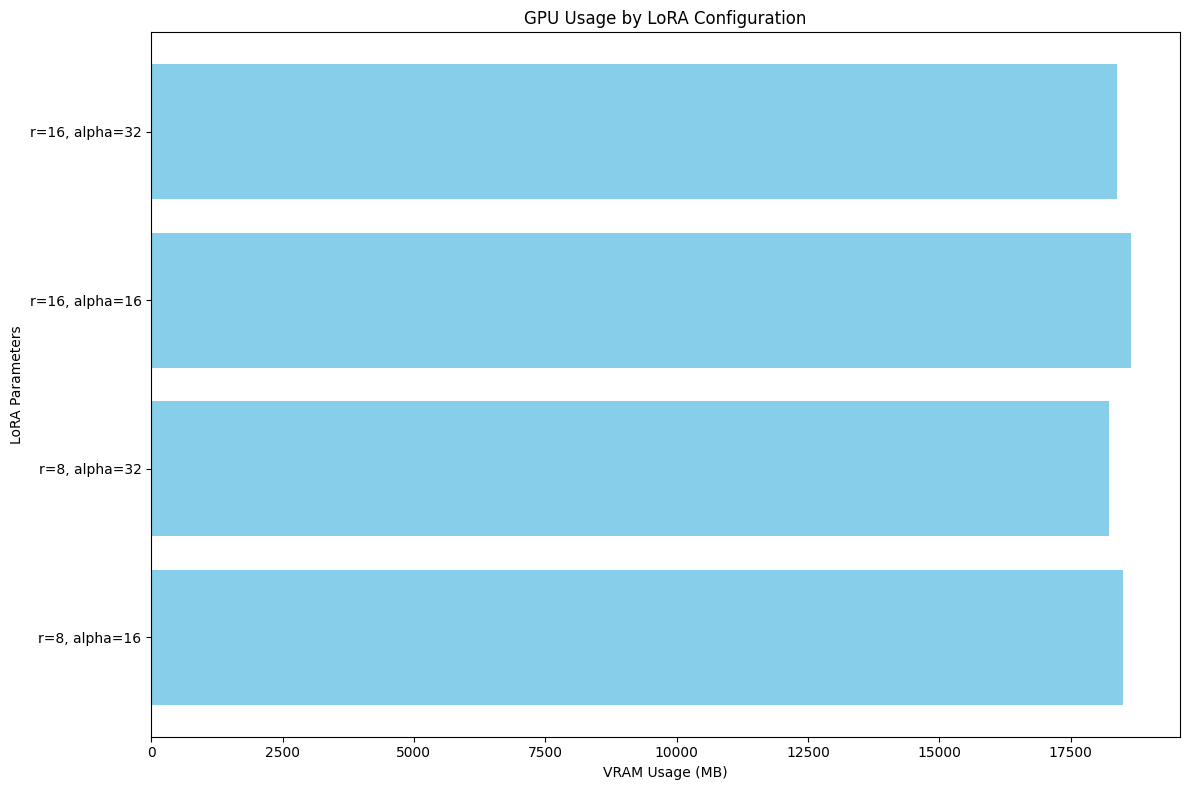

In [7]:
# GPU Usage Visualization
fig, ax = plt.subplots(figsize=(12, 8))

unique_configs = df.groupby(['r_value', 'lora_alpha_value']).first().reset_index()
ax.barh(unique_configs.index, unique_configs['vram_usage'], color='skyblue', tick_label=unique_configs.apply(lambda x: f'r={x["r_value"]}, alpha={x["lora_alpha_value"]}', axis=1))

ax.set_xlabel('VRAM Usage (MB)')
ax.set_ylabel('LoRA Parameters')
ax.set_title('GPU Usage by LoRA Configuration')
plt.tight_layout()
plt.show()


In [12]:
x = torch.randn(1000, 1000).cuda()
torch.cuda.memory_allocated()

4000256